In [1]:
import os
import pdb
import pickle
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

T = 13

In [2]:
# CATER-h
with open("train_heuris_last_visible_snitch_frame_1fps.pickle", 'rb') as f:
    data = pickle.load(f)
with open("val_heuris_last_visible_snitch_frame_1fps.pickle", 'rb') as f:
    data.update(pickle.load(f))
print(len(data))

frame_lvs = dict()
for fidx in range(1, T+1):
    frame_lvs[fidx] = 0
    
for vid in data:
    frame_lvs[data[vid]] += 1
    
print(frame_lvs)

7080
{1: 531, 2: 569, 3: 547, 4: 582, 5: 514, 6: 526, 7: 567, 8: 516, 9: 504, 10: 561, 11: 548, 12: 572, 13: 543}


In [3]:
for fidx in range(1, T+1):
    frame_lvs[fidx] = frame_lvs[fidx]/len(data)  # turn in to distribution

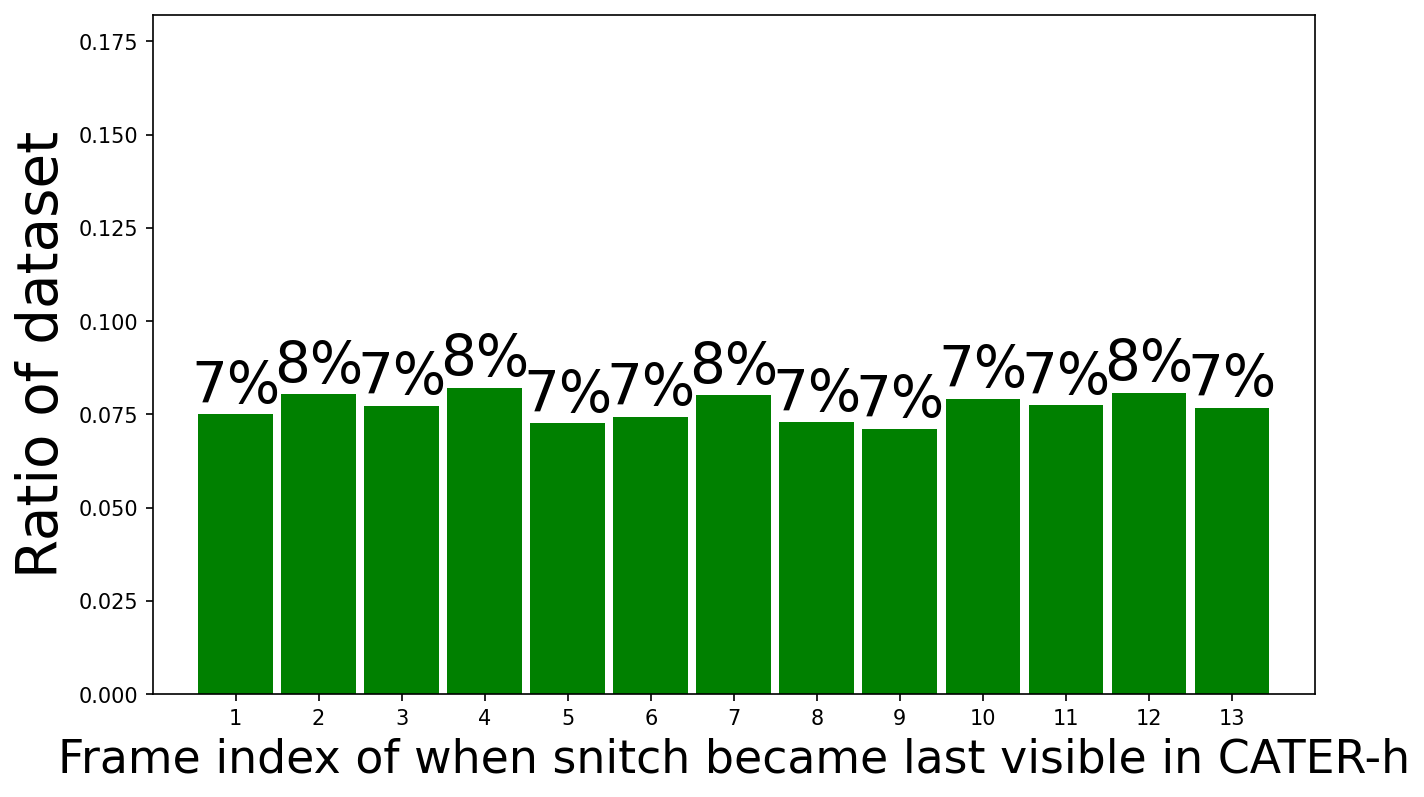

In [4]:
# color = 'maroon'

width = 0.9
myfontsize = 27

# plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(10, 6), dpi=150)
# fig = plt.figure()
ax = plt.gca()

rects = ax.bar(list(frame_lvs.keys()), list(frame_lvs.values()), width, color='g', alpha=1)
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}%'.format(int(height*100)), ha='center', va='bottom', 
             fontsize=myfontsize)

ax.set_xlabel('Frame index of when snitch became last visible in CATER-h', fontsize=22)
ax.set_ylabel('Ratio of dataset', fontsize=myfontsize)

ax.set_xlim([1-1.0,T+1.0])
ax.set_ylim([0, max(frame_lvs.values())+0.1])

plt.xticks(np.arange(1, 13+1, 1.0))

plt.savefig('CATER-h_plot_frame_last_visible_snitch.png', bbox_inches='tight')
plt.show()
plt.close()